#Chapter 6

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

#String Operations - .str

In [2]:
weather_2012 = pd.read_csv('data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


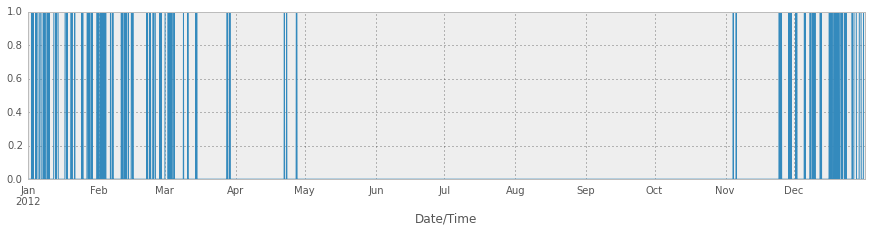

In [10]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow') # returns binary vector
is_snowing.plot() # plot boolean vector

###The `str` attribute of Series :  
`.str.contains('word')`, `.str.len()`, `.str.strip()`, `.str.split('by', expand=)`, `.str.replace('original', 'target')`, `.str.get(1)`, `.str.extract('[ab](\d)')`  

More methods [here](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods), also takes [regular expression](https://docs.python.org/2/library/re.html)

##Find snowiest months - resampling
Convenient for time series data.

`resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0)`

The following code returns a Series of median temp of each month:

In [13]:
weather_2012['Temp (C)'].resample('M', how=np.median)

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temp (C), dtype: float64

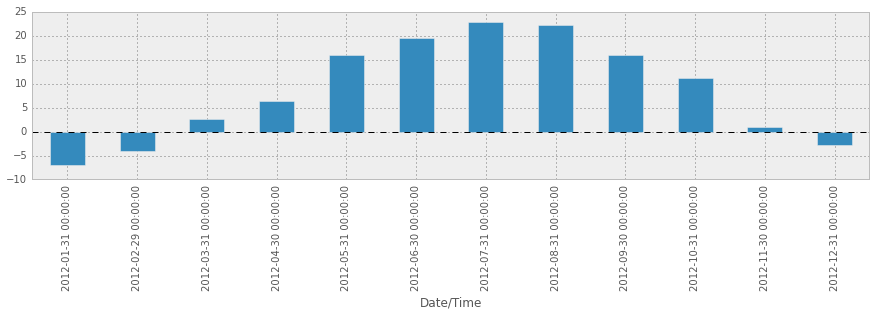

In [16]:
weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar')

Also we can track daily temperature:

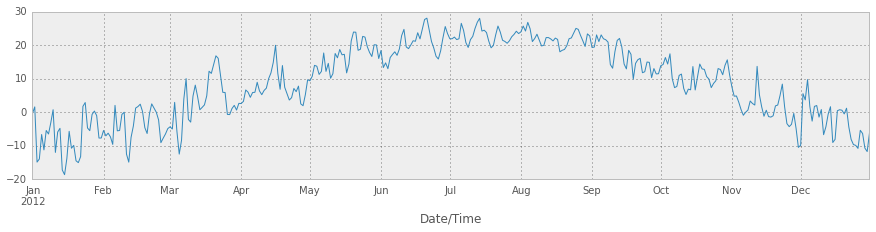

In [17]:
weather_2012['Temp (C)'].resample('D', how=np.median).plot()

We can also track the snowy days similarly, but need to convert boolean to float first

In [20]:
is_snowing.astype(float).resample('M', how=np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

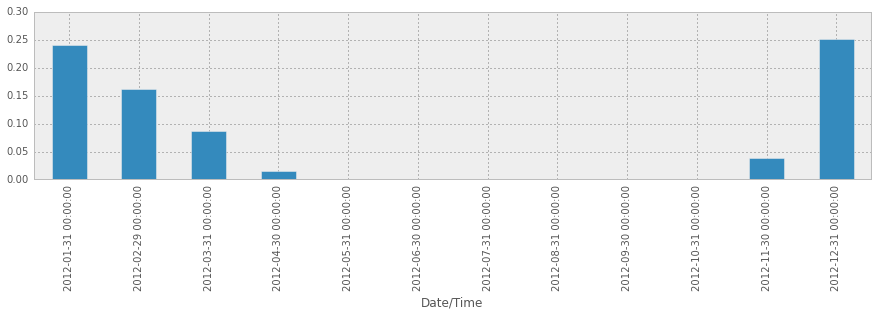

In [22]:
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar')

##Plot temperature and snowing stats together

In [28]:
temperature = weather_2012['Temp (C)'].resample('M', how=np.median)
snowiness = is_snowing.astype(float).resample('M', how=np.mean)
temperature.name = "Temperature"
snowiness.name = "Snowiness"
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


**<span style="color:red">Some inconsistency with tutorial: blanks on the top? Haven't figured out how to deal with it yet...</span>**

Two stats are too different in scale, so plot them in two subplots...

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E2822B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E46E470>], dtype=object)

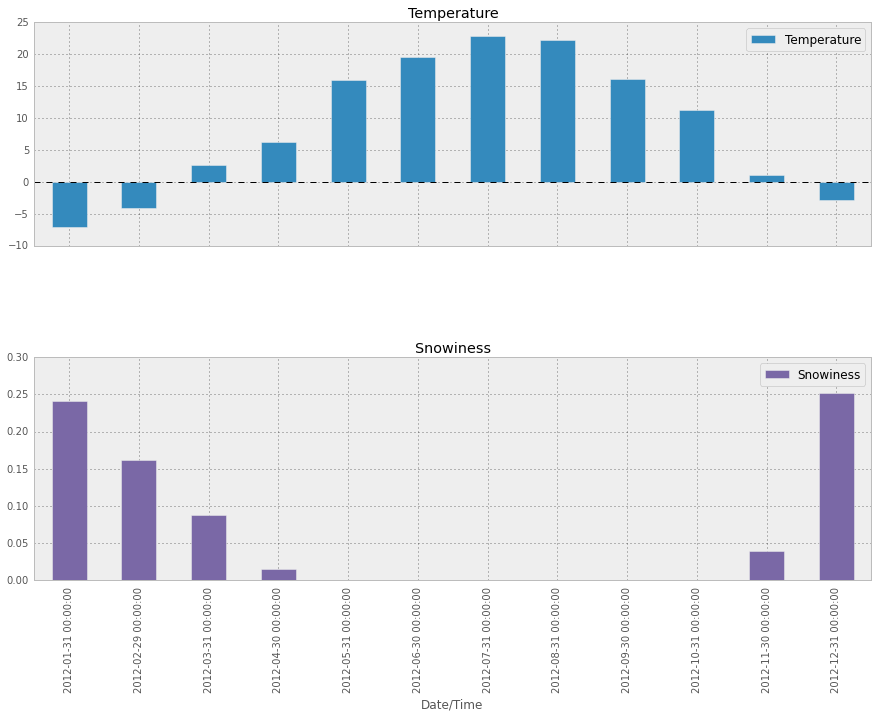

In [30]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

Or place them in columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E47EBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EAB4160>]], dtype=object)

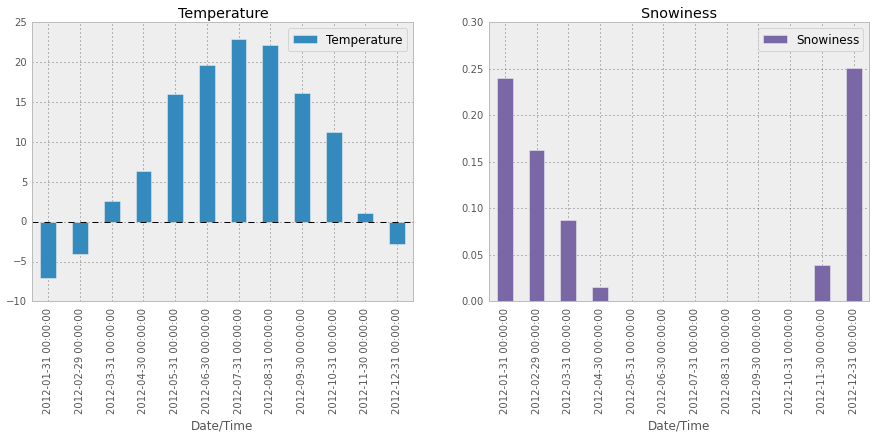

In [32]:
stats.plot(kind='bar', subplots=True, layout=(1,2), figsize=(15, 5))

# Summary

+ `str` attribute of Series : `.str.contains('word')`, `.str.len()`, `.str.strip()`, `.str.split('by', expand=)`, `.str.replace('original', 'target')`, `.str.get(1)`, `.str.extract('[ab](\d)')`
+ `timeseries.resample('M', how=np.median)` -- resampling time series data  
+ `.astype(float)` -- type conversion  
+ `stats.plot(kind='bar', subplots=True, layout=(1,2), figsize=(15, 5))` -- layout to change subplot positions